In [17]:
import os
import struct
import numpy as np
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

In [18]:
def wav_plotter(full_path):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

In [19]:
import subprocess
subprocess.Popen("ffmpeg -i SA1.WAV SA1_wav.wav")

sampling rate:  16000 Hz
bit depth:  16
duration:  2.9248125  second
number of samples:  46797


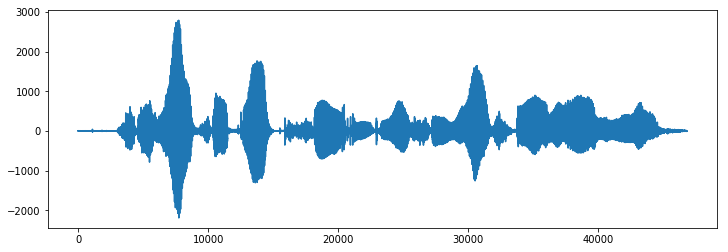

In [20]:
wav_plotter("SA1_wav.wav")

In [25]:
import librosa
librosa_load, librosa_sampling_rate = librosa.load("SA1_wav.wav")
scipy_sampling_rate, scipy_load = wav.read("SA1_wav.wav")
print('original sample rate:',scipy_sampling_rate)
print('converted sample rate:',librosa_sampling_rate)
print('original wav file min~max range:',np.min(scipy_load),'~',np.max(scipy_load))
print('converted wav file min~max range:',np.min(librosa_load),'~',np.max(librosa_load))


original sample rate: 16000
converted sample rate: 22050
original wav file min~max range: -2191 ~ 2790
converted wav file min~max range: -0.06840763 ~ 0.08671291


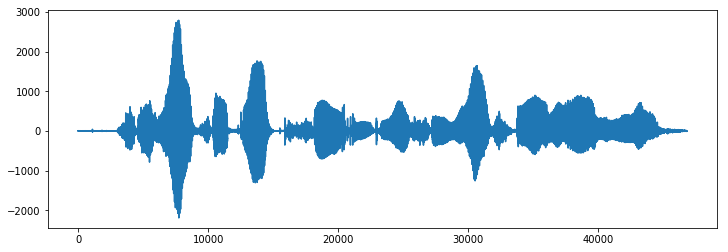

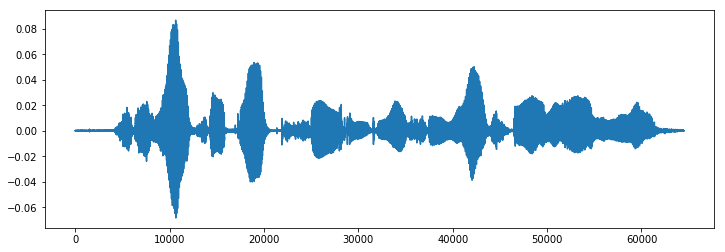

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_load)
plt.figure(figsize=(12, 4))
plt.plot(librosa_load)

In [31]:
import speech_recognition as sr

test = sr.AudioFile('SA1_wav.wav')
r = sr.Recognizer()

with test as source:
    audio = r.record(source)

In [32]:
type(audio)

speech_recognition.AudioData

In [33]:
r.recognize_google(audio)

'she has a dark suit and greasy Wash Water all year'

In [35]:
import librosa as lr
import matplotlib.pyplot as plt
import pylab
import librosa.display
import numpy as np

def audio_to_image(path,  outputname, height=192, width=192):
    signal, sr = lr.load(path, res_type='kaiser_fast')
    hl = signal.shape[0]//(width*1.1)
    spec = lr.feature.melspectrogram(signal, n_mels=height, hop_length=int(hl))
    img = lr.amplitude_to_db(spec)**2
    start = (img.shape[1] - width) // 2
    fig = plt.imshow(img[:, start:start+width])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig(outputname)
    return img[:, start:start+width]

array([[2075.26335213, 2075.26335213, 2075.26335213, ..., 2075.26335213,
        2075.26335213, 2075.26335213],
       [2075.26335213, 2075.26335213, 2075.26335213, ..., 2075.26335213,
        2075.26335213, 2075.26335213],
       [2075.26335213, 2075.26335213, 2075.26335213, ..., 2075.26335213,
        2075.26335213, 2075.26335213],
       ...,
       [2075.26335213, 2075.26335213, 2075.26335213, ..., 2075.26335213,
        2075.26335213, 2075.26335213],
       [2075.26335213, 2075.26335213, 2075.26335213, ..., 2075.26335213,
        2075.26335213, 2075.26335213],
       [2075.26335213, 2075.26335213, 2075.26335213, ..., 2075.26335213,
        2075.26335213, 2075.26335213]])

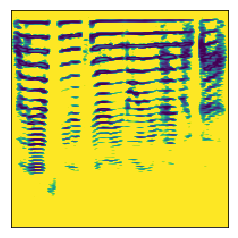

In [36]:
audio_to_image("TIMIT/TRAIN/DR1/FVMH0/SA2.WAV", "test.png")
#plt.imshow(audio_to_image("TIMIT/TRAIN/DR1/FVMH0/SA1.WAV"))